# Simple vs Log Returns and Normality Assumption

We will be looking at the difference between simple returns and log returns


Motivation: 
    
        - Simple returns:  The product of normally distributed variables is NOT normally distributed
        
        - Log returns:  The sum of normally distributed variables DOES follow a normal distribution
        
Later we will see why we have product or sum of returns!


In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

from pandas_datareader import data as pdr
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [5]:
end = dt.datetime.now()
start = dt.datetime(2020, 1, 1)

yf.pdr_override()
df = pdr.get_data_yahoo('TSLA', start, end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


## Simple Returns
**For one period**


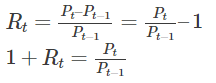

In [9]:
simple_returns = df.Close.pct_change()
simple_returns

Date
2020-01-02         NaN
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
                ...   
2023-07-21   -0.010955
2023-07-24    0.034767
2023-07-25   -0.014049
2023-07-26   -0.003506
2023-07-27   -0.029204
Name: Close, Length: 898, dtype: float64

In [10]:
simple_returns.dropna()  # Due to formula, we cant have day 0 return ...

Date
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
2020-01-09   -0.021945
                ...   
2023-07-21   -0.010955
2023-07-24    0.034767
2023-07-25   -0.014049
2023-07-26   -0.003506
2023-07-27   -0.029204
Name: Close, Length: 897, dtype: float64

#### To compute the return across multiple days (return singular) 
    
   It is called multi-period return:
    
          We have to multiply the different returns for each day to get the sum of returns over that period.
    

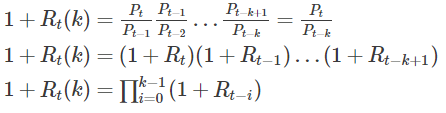

This is where the product comes from

In [12]:
df.Close.plot()

Testing the limitations of simple returns:

In [14]:
print('First', df.Close[0], 'last', df.Close[-1])

First 28.68400001525879 last 256.6300048828125


In [16]:
# Average across all above days:

simple_returns.mean()

0.003423181203071985

In [38]:
# Let's "try" to take close price and compute simple return everyday, This should give us our final stock price of 256.63

" We start from Close[0], and multiplying this everyday by .mean() and taking it to the power of day number, should give 256.63"

df.Close[0] * (1 + simple_returns.mean())**len(simple_returns)

df.Close[0] * (1 + 0.003423181203071985)**len(simple_returns)

617.1466730356598

In [39]:
df.Close[-1]

256.6300048828125

#### So it doesn't give the right price, we need to instead use the 3rd equation, taking the product of all the (1 + daily returns)


The mean() is no longer a useful statistic, it doesn't mean much to us.

In [46]:
# Let us do it the right way now, using 3rd eqt.

df.Close[0] * np.prod( [(1 + Rt) for Rt in simple_returns.dropna()] )
    

256.63000488281267

In [37]:
# Implementing the first equation to get the last return on day [-1]  (last day)


for i in range(0, len(simple_returns)):
    holder = 1
    if i > 0:
        a = df.Close[i]/df.Close[i-1]
        holder = holder * a
Rt = holder - 1
print(Rt)

-0.029203711149831002


In [34]:
simple_returns[-1]

-0.029203711149831002